In [6]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

# load a single file as a numpy array
def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# load a list of files into a 3D array of [samples, timesteps, features]
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_' + group + '.txt', 'total_acc_y_' + group + '.txt', 'total_acc_z_' + group + '.txt']
    # body acceleration
    filenames += ['body_acc_x_' + group + '.txt', 'body_acc_y_' + group + '.txt', 'body_acc_z_' + group + '.txt']
    # body gyroscope
    filenames += ['body_gyro_x_' + group + '.txt', 'body_gyro_y_' + group + '.txt', 'body_gyro_z_' + group + '.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_' + group + '.txt')
    return X, y

def to_categorical(y, num_classes=None, dtype='float32'):
    """Converts a class vector (integers) to binary class matrix.
    E.g. for use with categorical_crossentropy.
    # Arguments
        y: class vector to be converted into a matrix
            (integers from 0 to num_classes).
        num_classes: total number of classes.
        dtype: The data type expected by the input, as a string
            (`float32`, `float64`, `int32`...)
    # Returns
        A binary matrix representation of the input. The classes axis
        is placed last.
    # Example
    ```python
    # Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
    > labels
    array([0, 2, 1, 2, 0])
    # `to_categorical` converts this into a matrix with as many
    # columns as there are classes. The number of rows
    # stays the same.
    > to_categorical(labels)
    array([[ 1.,  0.,  0.],
           [ 0.,  0.,  1.],
           [ 0.,  1.,  0.],
           [ 0.,  0.,  1.],
           [ 1.,  0.,  0.]], dtype=float32)
    ```
    """

    y = np.array(y, dtype='int')
    input_shape = y.shape
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])
    y = y.ravel()
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype=dtype)
    categorical[np.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
    print(trainX.shape, trainy.shape)
    # load all test
    testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
    print(testX.shape, testy.shape)
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy

# load data set and split into training and testing inputs (X) and outputs (y)
trainX, trainy, testX, testy = load_dataset("C:/Users/user/Downloads/")

n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]



C:\Users\user\AppData\Local\Temp\ipykernel_17128\2496398293.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_17128\2496398293.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_17128\2496398293.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_17128\2496398293.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be rem

(7352, 128, 9) (7352, 1)


C:\Users\user\AppData\Local\Temp\ipykernel_17128\2496398293.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_17128\2496398293.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_17128\2496398293.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_17128\2496398293.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be rem

(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)


C:\Users\user\AppData\Local\Temp\ipykernel_17128\2496398293.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)


In [7]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).to(x.device)
        out, (hn, cn) = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

n_features = 9  # 입력 차원 (특성의 수)
hidden_dim = 100  # LSTM의 히든 레이어 크기
layer_dim = 1  # LSTM 레이어의 수
n_outputs = trainy.shape[1]  # 출력 클래스의 수

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = LSTMModel(n_features, hidden_dim, layer_dim, n_outputs)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

trainXT = torch.tensor(trainX, dtype=torch.float32).to(device)
trainyT = torch.tensor(trainy, dtype=torch.long).max(1)[1].to(device)
testXT = torch.tensor(testX, dtype=torch.float32).to(device)
testyT = torch.tensor(testy, dtype=torch.long).max(1)[1].to(device)

In [8]:
num_epochs = 100
batch_size = 32

# For tracking the training progress
loss_list_epoch = []
acc_list_epoch = []
test_loss_list = []
test_acc_list = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_sum = 0
    total = 0

    for i in range(int(np.ceil(len(trainXT) / batch_size))):
        indices = slice(i * batch_size, min((i + 1) * batch_size, len(trainXT)))
        inputs, labels = trainXT[indices].to(device), trainyT[indices].to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct_sum += (predicted == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = train_loss / total
    avg_train_acc = correct_sum / total
    loss_list_epoch.append(avg_train_loss)
    acc_list_epoch.append(avg_train_acc)

    # Evaluation on the test set
    model.eval()
    test_loss = 0.0
    correct_t = 0
    total_t = 0
    with torch.no_grad():
        for inputs, labels in zip(testXT, testyT):
            outputs = model(inputs.unsqueeze(0))
            loss = criterion(outputs, labels.unsqueeze(0))
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct_t += (predicted == labels).sum().item()
            total_t += 1
    
    avg_test_loss = test_loss / total_t
    avg_test_acc = correct_t / total_t
    test_loss_list.append(avg_test_loss)
    test_acc_list.append(avg_test_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}, Accuracy: {avg_train_acc:.4f}, Test Loss: {avg_test_loss:.4f}, Test Accuracy: {avg_test_acc:.4f}')

Epoch [1/100], Loss: 1.4611, Accuracy: 0.3475, Test Loss: 1.3750, Test Accuracy: 0.3488
Epoch [2/100], Loss: 1.4092, Accuracy: 0.3648, Test Loss: 1.4250, Test Accuracy: 0.3420
Epoch [3/100], Loss: 1.3368, Accuracy: 0.4290, Test Loss: 1.6696, Test Accuracy: 0.3254
Epoch [4/100], Loss: 1.3467, Accuracy: 0.4177, Test Loss: 1.3167, Test Accuracy: 0.4829
Epoch [5/100], Loss: 1.2749, Accuracy: 0.4728, Test Loss: 1.3052, Test Accuracy: 0.5321
Epoch [6/100], Loss: 1.3804, Accuracy: 0.4553, Test Loss: 1.4154, Test Accuracy: 0.4866
Epoch [7/100], Loss: 1.4239, Accuracy: 0.4249, Test Loss: 1.9013, Test Accuracy: 0.3465
Epoch [8/100], Loss: 1.4132, Accuracy: 0.4555, Test Loss: 1.2922, Test Accuracy: 0.4272
Epoch [9/100], Loss: 1.0756, Accuracy: 0.5433, Test Loss: 1.3275, Test Accuracy: 0.3926
Epoch [10/100], Loss: 1.0735, Accuracy: 0.5419, Test Loss: 1.1024, Test Accuracy: 0.4941
Epoch [11/100], Loss: 1.0001, Accuracy: 0.5612, Test Loss: 1.0064, Test Accuracy: 0.5541
Epoch [12/100], Loss: 1.3173, 

In [9]:
# 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc_list_epoch, label='Training Accuracy')
plt.plot(test_acc_list, label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlim(0,100)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss_list_epoch, label='Training Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

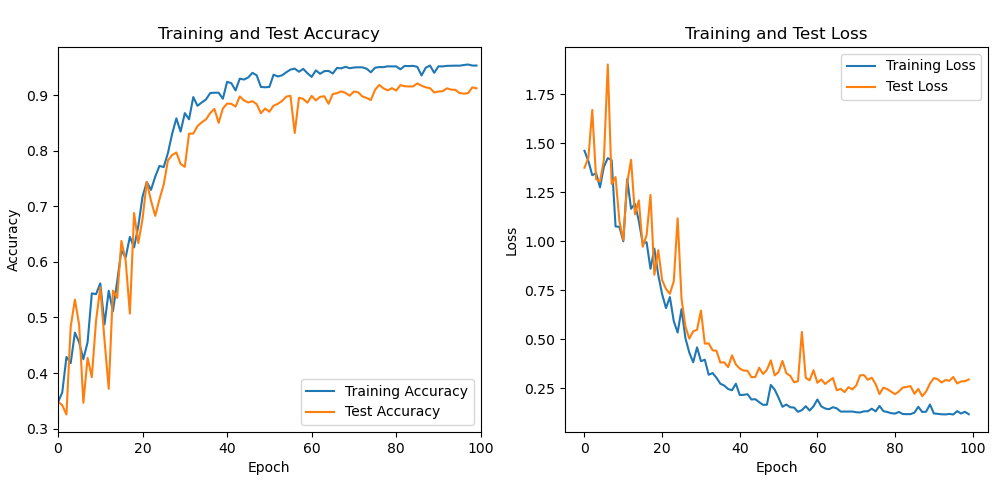

In [10]:
from IPython.display import Image

image_path = "C:/Users/user/OneDrive/바탕 화면/test3.png"
Image(filename=image_path)